In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sacc
import yaml

In [2]:
path = "/home/jaimerz/Documents/UCL/HSC-PDR1-3x2pt-harmonic-methods/data/harmonic/txpipe/source_s16a_lens_dr1/all-fields/dndz/"
DS_s = sacc.Sacc.load_fits(path+"summary_statistics_fourier_all_SourcesS16A_LensesDR1_pz_mc_eab_HikageShearSC_DESC_GCandGGL_SC_kmax_0.15_1.471COVMAT.sacc")

In [3]:
DS_nzs = {}
for (name, tracer) in DS_s.tracers.items():
    DS_nzs[name] = [tracer.z, tracer.nz]

In [4]:
path = 'data/HSC/DESwl_final_HSC_cls_NzMarg_cov_p5.0_area2_diag4.0.fits'
CGG_s = sacc.Sacc.load_fits(path)

In [14]:
CGG_nzs = {}
for (name, tracer) in CGG_s.tracers.items():
    z = tracer.z
    nz = tracer.nz
    nz = nz*np.mean(np.diff(z))
    CGG_nzs[name] = [z, nz]

In [15]:
nzs_carlos = np.load('data/HSC/DESwl_final_HSC_covNzMarg_p5.0_diag4.0.npz')
nzs_TQ = np.load('data/HSC/HSC_nzs_TQ.npz')

In [16]:
errs = np.sqrt(np.diag(nzs_carlos['cov_nz']))

0 100
1 100
2 100
3 100
4 100
5 100
6 100
7 100


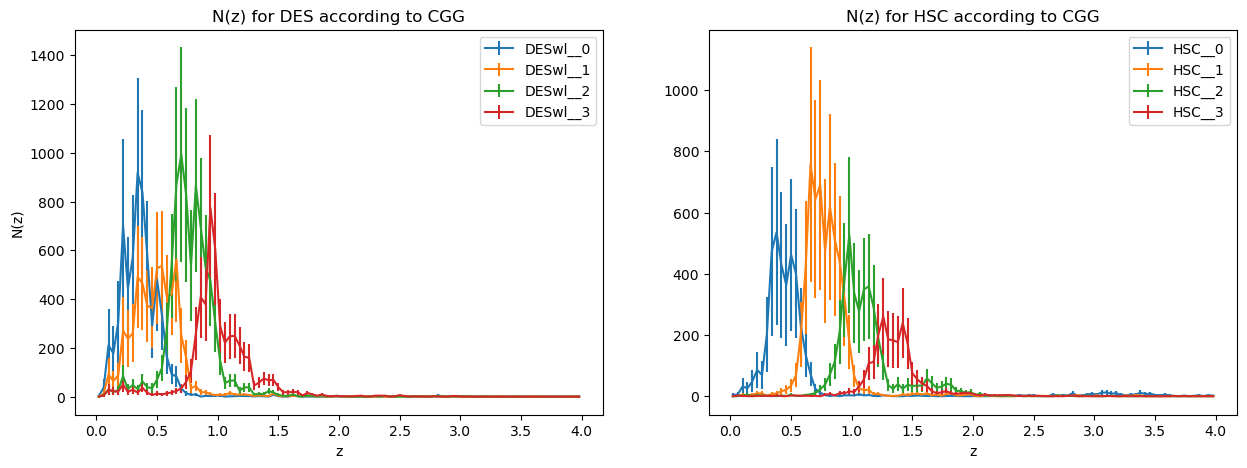

In [18]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
for i, (name, nz) in enumerate(CGG_nzs.items()):
    err = errs[100*i:100*(i+1)]
    print(i, len(err))
    if 'HSC' in name:
        axes[1].errorbar(nz[0], nz[1], yerr=err, label=name)
        axes[1].legend()
        axes[1].set_xlabel('z')
        axes[1].set_title('N(z) for HSC according to CGG')

    else:
        axes[0].errorbar(nz[0], nz[1], yerr=err, label=name)
        axes[0].legend()
        axes[0].set_xlabel('z')
        axes[0].set_ylabel('N(z)')
        axes[0].set_title('N(z) for DES according to CGG')
plt.show()

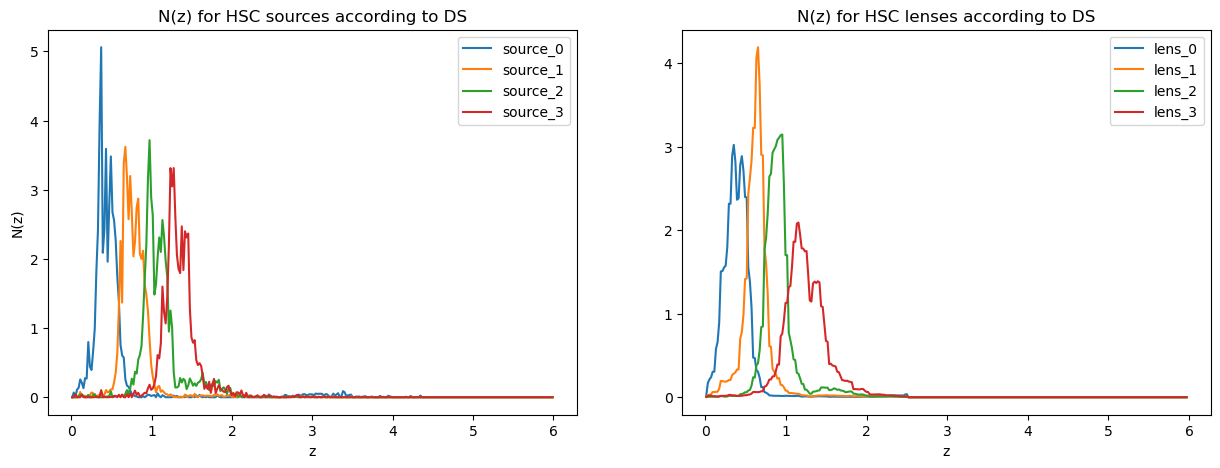

In [12]:
figure, axes = plt.subplots(1, 2, figsize=(15, 5))
for (name, nz) in DS_nzs.items():
    if 'lens' in name:
        axes[1].plot(nz[0], nz[1], label=name)
        axes[1].legend()
        axes[1].set_xlabel('z')
        axes[1].set_title('N(z) for HSC lenses according to DS')

    else:
        axes[0].plot(nz[0], nz[1], label=name)
        axes[0].legend()
        axes[0].set_xlabel('z')
        axes[0].set_ylabel('N(z)')
        axes[0].set_title('N(z) for HSC sources according to DS')

plt.legend()
plt.show()